In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel(r"C:\Users\Asus\Desktop\DDP\1D_master_dataset.xlsx")

In [5]:
data.head()

,Time(s),Alpha,X,x/L,T_left,T_right,T_initial,Temperature
0,0.01,0.0001,0.0,0.0,300,0,27,300.0
1,0.02,0.0001,0.0,0.0,300,0,27,300.0
2,0.03,0.0001,0.0,0.0,300,0,27,300.0
3,0.05,0.0001,0.0,0.0,300,0,27,300.0
4,0.10,0.0001,0.0,0.0,300,0,27,300.0


In [6]:
data.describe()

,Time(s),Alpha,X,x/L,T_left,T_right,T_initial,Temperature
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.0,5824.000000
mean,16.665962,0.000036,0.005000,0.500000,450.000000,150.000000,27.0,210.387281
std,35.998539,0.000045,0.003334,0.333362,111.812999,111.812999,0.0,166.656319
min,0.010000,0.000001,0.000000,0.000000,300.000000,0.000000,27.0,0.000000
25%,0.100000,0.000001,0.001667,0.166667,375.000000,75.000000,27.0,44.796381
50%,1.000000,0.000010,0.005000,0.500000,450.000000,150.000000,27.0,200.000000
75%,12.500000,0.000100,0.008333,0.833333,525.000000,225.000000,27.0,308.496669
max,200.000000,0.000100,0.010000,1.000000,600.000000,300.000000,27.0,600.000000


In [7]:
import time
#storing starting time
begin = time.time()

#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data.loc[:, ['T_left', 'T_right','Time(s)', 'x/L', 'Alpha']]
y = data['Temperature']
x.shape, y.shape 

((5824, 5), (5824,))

In [8]:
#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [9]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [10]:
lr = LR()
# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

94.58658229764333


In [11]:
#storing end time
time.sleep(1)
end = time.time()

#Calculating runtime
print ("Total runtime of Linear Regression program (in seconds) is", end - begin)

Total runtime of Linear Regression program (in seconds) is 9.252151489257812


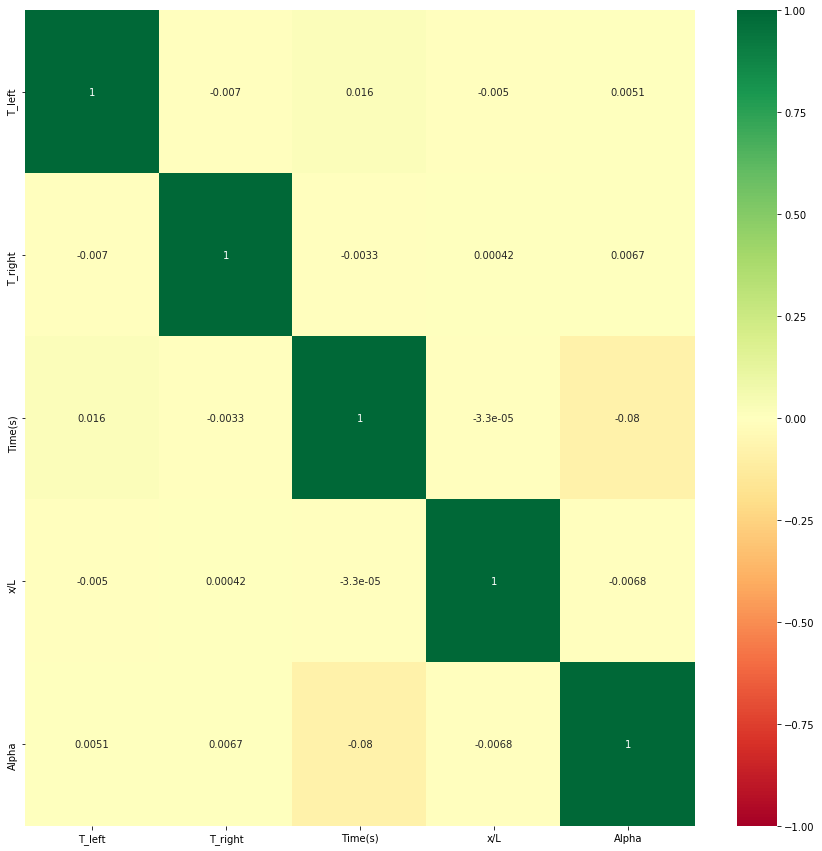

In [12]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show()   

In [13]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 97.0605009878433


In [14]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     99.0673845257569


In [15]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['T_left', 'T_right', 'Time(s)', 'x/L','Alpha'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

  Variables    Coefficient
0    T_left       0.326475
1   T_right       0.346833
2   Time(s)       1.092091
3       x/L    -258.747095
4     Alpha  808075.461766


Text(0.5, 1.0, 'Coefficient plot')

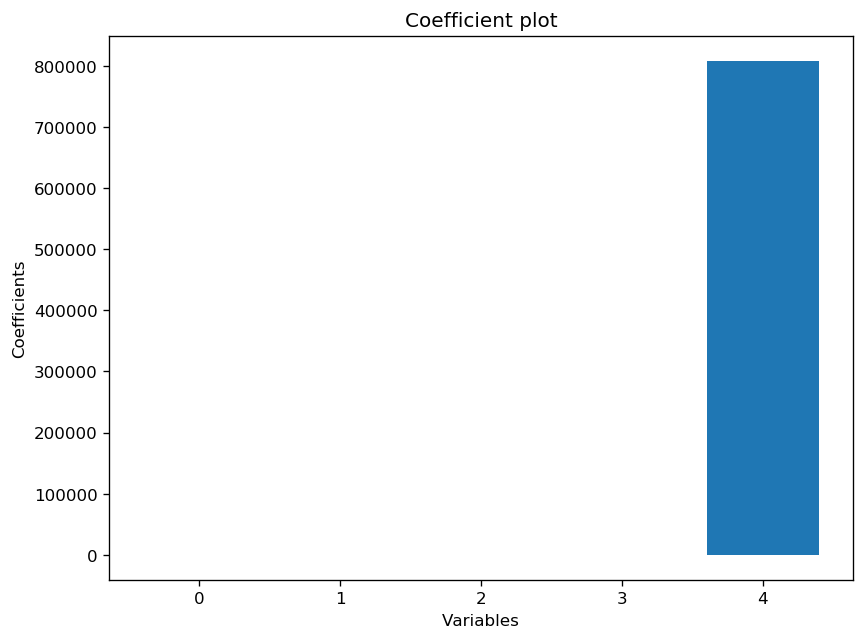

In [16]:
#Unscaled Coefficient vs Variable plot
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [17]:
lr.score(train_x, train_y)*100

47.70031814356914

In [18]:
lr.score(test_x,test_y)*100

48.154463928432875

In [19]:
y_pred = lr.predict(test_x)
print (y_pred)

[259.87882174 317.14276129 339.49135686 ...  86.92370097 247.01932799
 131.84042418]


In [20]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
640,300.000000,259.878822
2804,350.000000,317.142761
2746,400.000000,339.491357
4313,400.000000,226.006483
1158,60.078125,157.725076
...,...,...
4888,27.000000,86.144995
3955,30.378588,184.950519
3914,49.905918,86.923701
3487,28.038563,247.019328


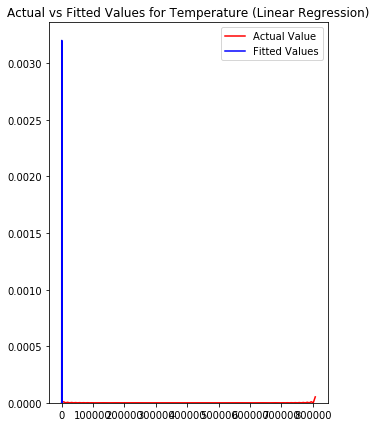

In [21]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature (Linear Regression)')


plt.show()
plt.close()

## Scaling the Variables

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [23]:
data['scaled_T_left']   = StandardScaler().fit_transform(data[['T_left']])
data['scaled_T_right']  = StandardScaler().fit_transform(data[['T_right']])
data['scaled_time']     = StandardScaler().fit_transform(data[['Time(s)']])
data['scaled_location'] = StandardScaler().fit_transform(data[['x/L']])
data['scaled_alpha']    = StandardScaler().fit_transform(data[['Alpha']])
data

,Time(s),Alpha,X,x/L,T_left,T_right,T_initial,Temperature,scaled_T_left,scaled_T_right,scaled_time,scaled_location,scaled_alpha
0,0.01,0.000100,0.00,0.0,300,0,27,300.0,-1.341641,-1.341641,-0.462724,-1.5,1.429927
1,0.02,0.000100,0.00,0.0,300,0,27,300.0,-1.341641,-1.341641,-0.462446,-1.5,1.429927
2,0.03,0.000100,0.00,0.0,300,0,27,300.0,-1.341641,-1.341641,-0.462168,-1.5,1.429927
3,0.05,0.000100,0.00,0.0,300,0,27,300.0,-1.341641,-1.341641,-0.461613,-1.5,1.429927
4,0.10,0.000100,0.00,0.0,300,0,27,300.0,-1.341641,-1.341641,-0.460224,-1.5,1.429927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,20.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,0.092624,1.5,-0.792677
5820,30.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,0.370437,1.5,-0.792677
5821,50.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,0.926063,1.5,-0.792677
5822,100.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,2.315127,1.5,-0.792677


In [24]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data.loc[:, ['scaled_T_left', 'scaled_T_right','scaled_time', 'scaled_location', 'scaled_alpha']]
y = data['Temperature']
x.shape, y.shape

((5824, 5), (5824,))

In [25]:

# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
#dataset = loadtxt('housing.csv', delimiter=",")
# split into inputs and outputs
#X, y = dataset[:, :-1], dataset[:, -1]
x = data.loc[:, ['scaled_T_left', 'scaled_T_right','scaled_time', 'scaled_location', 'scaled_alpha']]
y = data['Temperature']
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', StandardScaler()), ('model', LR())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 97.769


In [26]:
import time
#storing starting time
begin = time.time()

#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [27]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [28]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

211.69180085572307


In [29]:
#storing end time
time.sleep(1)
end = time.time()

#Calculating runtime
print ("Total runtime of Random Forest program (in seconds) is", end - begin)

Total runtime of Random Forest program (in seconds) is 2.438900947570801


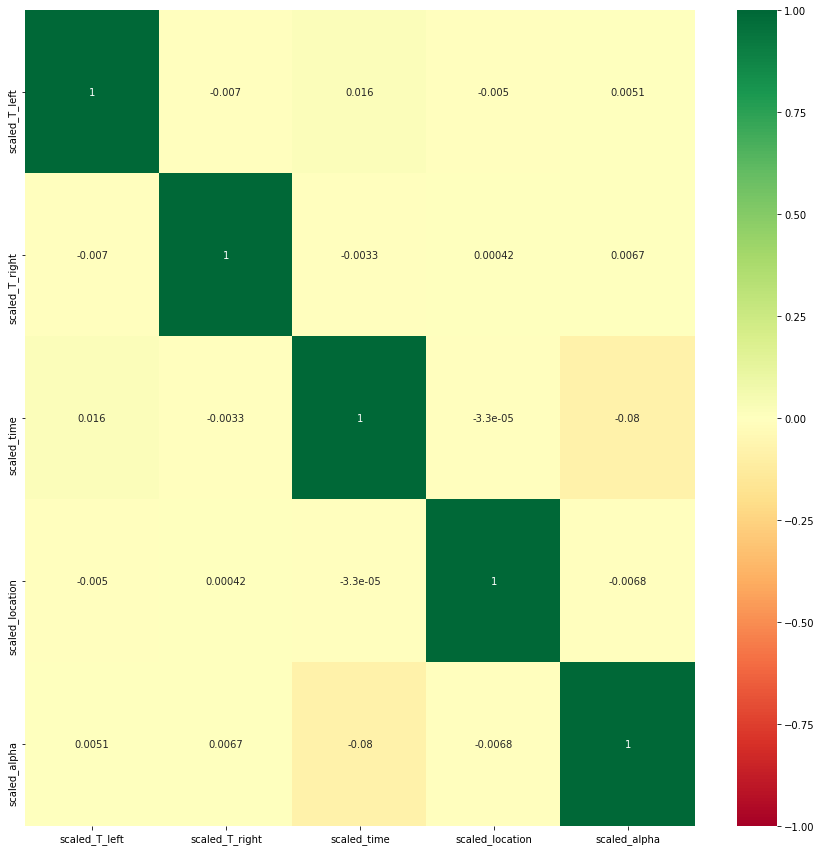

In [30]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show() 

In [31]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 97.06050098784324


In [32]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     99.06738452575686


In [33]:
lr.coef_

array([ 36.50101006,  38.77709098,  39.31031753, -86.24903159,
        35.99357793])

In [34]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['scaled_T_left', 'scaled_T_right', 'scaled_time', 'scaled_location','scaled_Alpha'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

         Variables  Coefficient
0    scaled_T_left    36.501010
1   scaled_T_right    38.777091
2      scaled_time    39.310318
3  scaled_location   -86.249032
4     scaled_Alpha    35.993578


Text(0.5, 1.0, 'Coefficient plot')

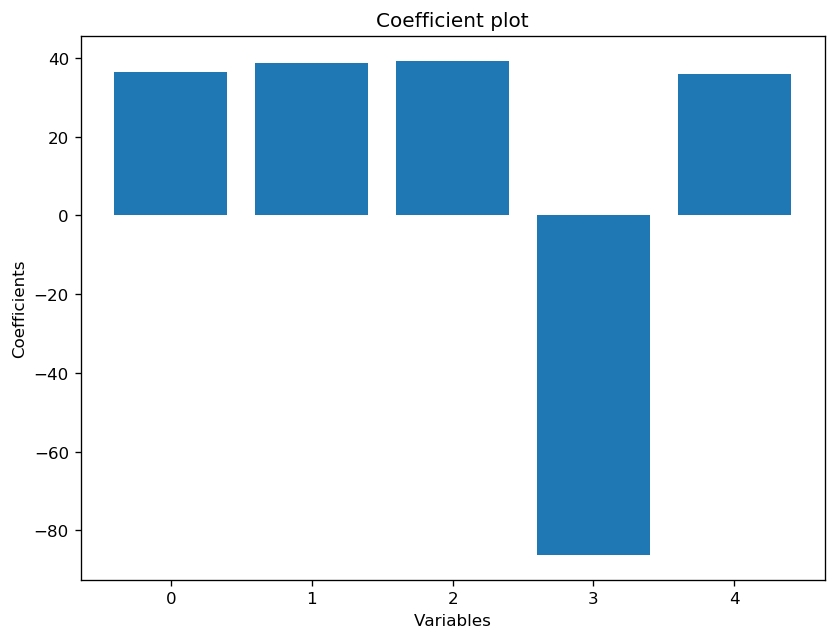

In [35]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [36]:
lr.score(train_x, train_y)*100

47.70031814356914

In [37]:
lr.score(test_x,test_y)*100

48.154463928432854

In [38]:
y_pred = lr.predict(test_x)
print (y_pred)

[259.87882174 317.14276129 339.49135686 ...  86.92370097 247.01932799
 131.84042418]


In [39]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
640,300.000000,259.878822
2804,350.000000,317.142761
2746,400.000000,339.491357
4313,400.000000,226.006483
1158,60.078125,157.725076
...,...,...
4888,27.000000,86.144995
3955,30.378588,184.950519
3914,49.905918,86.923701
3487,28.038563,247.019328


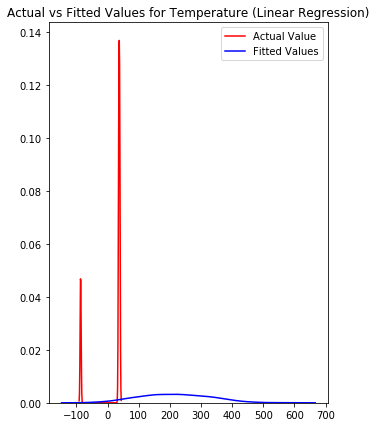

In [40]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature (Linear Regression)')


plt.show()
plt.close()

## Using Analytical Solution to create features

In [41]:
#Taking Negative Natural Logarithm values of Diffusion Coefficient
#data['negLog_DC'] = np.log(data['Diffusion Coeff'])*(-1)

data['exp t1'] = np.exp((-10)* data['Time(s)'])

data['exp t2'] = np.exp((-40)* data['Time(s)'])

data['exp t3'] = np.exp((-90)* data['Time(s)'])

data['sq_x/L'] = np.square(data['x/L'])

data['Tl-Tr'] = data['T_left'] - data['T_right']

data['Tl+Tr'] = data['T_left'] + data['T_right']

data['(sq_x/L)-x/L'] = data['sq_x/L'] - data['x/L']

data['deltaT_x/L'] = data['Tl-Tr'] * data['x/L']

data['Timespace1'] = data['(sq_x/L)-x/L'] * data['Tl+Tr'] * data['exp t1'] 

data['Timespace2'] = data['(sq_x/L)-x/L'] * data['Tl-Tr'] * data['exp t2']

data['Timespace3'] = data['(sq_x/L)-x/L'] * data['Tl+Tr'] * data['exp t3']
#data['DCParameter'] = (data['Diffusion Coeff'] * data['Time(s)'] * data['Tl-Tr']) / (data['sq_x/L'])


In [42]:
data.tail(17)

,Time(s),Alpha,X,x/L,T_left,T_right,T_initial,Temperature,scaled_T_left,scaled_T_right,...,exp t2,exp t3,sq_x/L,Tl-Tr,Tl+Tr,(sq_x/L)-x/L,deltaT_x/L,Timespace1,Timespace2,Timespace3
5807,0.02,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,4.493290e-01,1.652989e-01,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5808,0.03,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,3.011942e-01,6.720551e-02,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5809,0.05,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,1.353353e-01,1.110900e-02,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5810,0.10,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,1.831564e-02,1.234098e-04,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5811,0.20,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,3.354626e-04,1.522998e-08,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5812,0.30,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,6.144212e-06,1.879529e-12,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5813,0.50,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,2.061154e-09,2.862519e-20,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5814,1.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,4.248354e-18,8.194013e-40,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5815,2.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,1.804851e-35,6.714184e-79,1.0,300,900,0.0,300.0,0.0,0.0,0.0
5816,3.00,0.000001,0.01,1.0,600,300,27,300.0,1.341641,1.341641,...,7.667648e-53,5.501611e-118,1.0,300,900,0.0,300.0,0.0,0.0,0.0


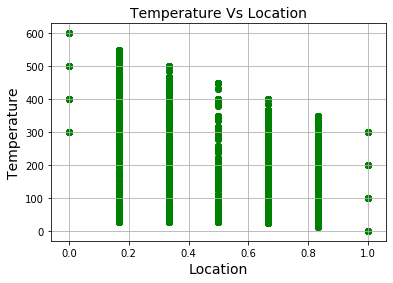

In [43]:
plt.scatter(data['x/L'], data['Temperature'], color='green')
plt.title('Temperature Vs Location', fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

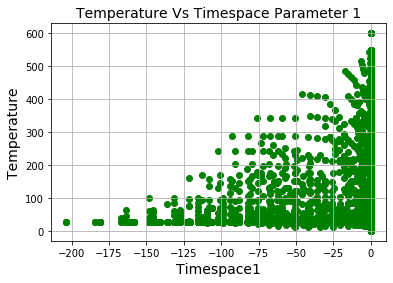

In [44]:
plt.scatter(data['Timespace1'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace Parameter 1', fontsize=14)
plt.xlabel('Timespace1', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

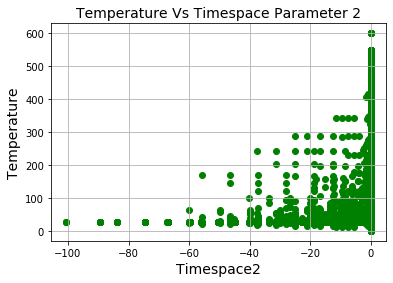

In [45]:
plt.scatter(data['Timespace2'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace Parameter 2', fontsize=14)
plt.xlabel('Timespace2', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

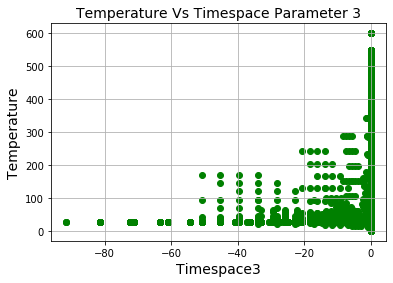

In [46]:
plt.scatter(data['Timespace3'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace Parameter 3', fontsize=14)
plt.xlabel('Timespace3', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

In [47]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data.loc[:, ['T_left', 'Alpha', 'deltaT_x/L','Timespace1', 'Timespace2', 'Timespace3']]
y = data['Temperature']
x.shape, y.shape

((5824, 6), (5824,))

In [48]:
#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [49]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [50]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

-17.399506662003574


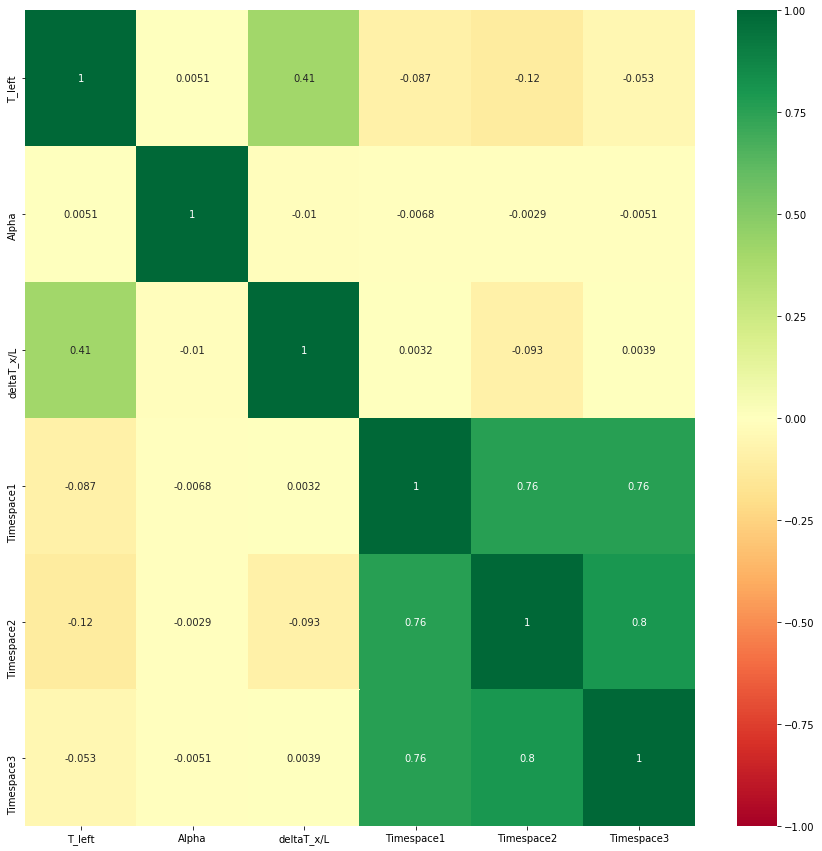

In [51]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show()   

In [52]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 61.34834008687789


In [53]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     60.31800585234076


In [54]:
lr.coef_

array([ 8.28598593e-01,  7.34208998e+05, -8.65068332e-01,  2.92989266e+00,
       -9.45872208e-01, -1.57132942e+00])

In [56]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['T_left', 'deltaT_x/L', 'Alpha', 'Timespace1', 'Timespace2','Timespace3'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

    Variables    Coefficient
0      T_left       0.828599
1  deltaT_x/L  734208.998203
2       Alpha      -0.865068
3  Timespace1       2.929893
4  Timespace2      -0.945872
5  Timespace3      -1.571329


Text(0.5, 1.0, 'Coefficient plot')

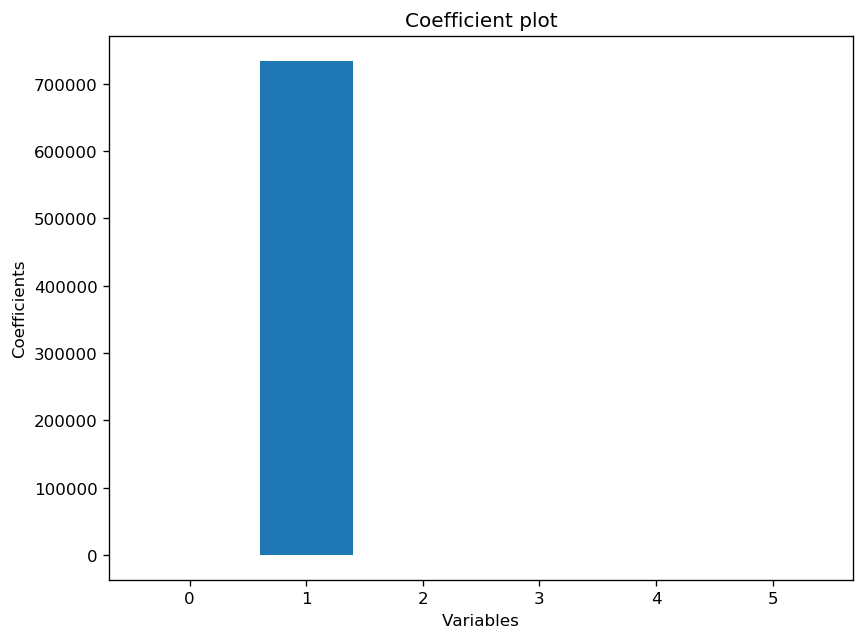

In [57]:
#Unscaled Coefficient vs Variable plot
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [58]:
lr.score(train_x, train_y)*100

74.63110580282039

In [59]:
lr.score(test_x,test_y)*100

77.38855940797147

In [60]:
# Creating instance of Linear Regresssion
lr_2 = LR(normalize = True)

# Fitting the model
lr_2.fit(train_x, train_y)
print (lr_2.intercept_)

-17.399506692414803


In [61]:
# Predicting over the Train Set and calculating error
train_predict = lr_2.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 61.34834008580323


In [62]:
# Predicting over the Test Set and calculating error
test_predict = lr_2.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     60.318005851604326


Text(0, 0.5, 'Coefficients')

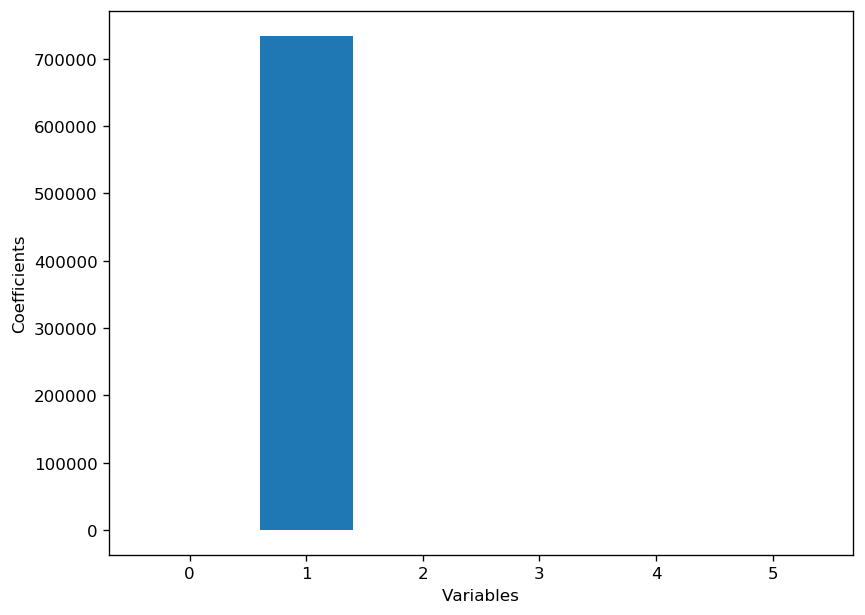

In [64]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr_2.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
#plt.title('Normalized Coefficient plot')

In [65]:
lr.score(test_x,test_y)*100

77.38855940797147

In [ ]:
lr.predict ()

In [ ]:
#Temperature prediction at Node 1 at 2.5s for an object with Diffusion Coeff = 10e-06 for T_left = 400 C and T_right = 100C
t = 2.7
#lt = np.log(t)
DC = 0.00001
T_l = 400
T_r = 100
deltaT = T_l - T_r
x   = 0.33
deltaTxL = deltaT * x 
#DCParameter = (DC * t * deltaT) / np.square(x)
Timespace1 = np.exp((-10)*t) * (np.square(x)-x) * (T_l + T_r)
Timespace2 = np.exp((-40)*t) * (np.square(x)-x) * (T_l - T_r)
Timespace3 = np.exp((-90)*t) * (np.square(x)-x) * (T_l + T_r)

Predict_Temp = ((lr.intercept_) + (lr.coef_[0])*(T_l) + (lr.coef_[1])*(deltaTxL) + (lr.coef_[2])*(Timespace1) + (lr.coef_[3])*(Timespace2) + (lr.coef_[4])*(Timespace3)) 

##Predict_Temp = (lr.intercept_) + (lr.coef_[0])*(t_l) + (lr.coef_[1])*(t_r) + (lr.coef_[2])*(nldc) + (lr.coef_[3])*(lt) + (lr.coef_[4])*(n_0) + (lr.coef_[5])*(n_1) + (lr.coef_[6])*(n_2) + (lr.coef_[7])*(n_3) + (lr.coef_[8])*(n_4) 

print(Predict_Temp)